# How does the covid affect the mobility?
## A comparison between a wealthier and less wealthy country

TIL 6022 Project, Group 1

Cynthia Cai, Chenghua Yang, Daniel Auerbach, Runsheng Liu

# 1 Research Objective

The research objective is to study the difference of COVID-19’s influence in mobility and mobility-related situations in countires of a different wealth category. To answer this question, we select Netherlands, Poland and Romania as the research objects, and come up with four sub-domains.

- traffic volume
    - the total amount of mobility
- travelling behaviour
    - visits and length of stay at different places change, like retail, grocery, workplace, etc
- transport modes and hospital rate
    - transportation modes include bus, subway, private cars
- Level of digitalization
    - digitalization will lead to less travelling needs

# 2 Methodology

## 2.1 Pipeline

For each sub-domain, we apply the following pipeline.

1. Select and download datasets based on research objective
2. Data processing, like removing outliers, filling in null values (in seperate notebooks)
3. Analysis and data visualization (in the main notebook)
4. Conclusion

## 2.2 Data Source

The details about data used is in the seperate process notebooks. Here we attach the main data sources of our project.

- Eurostat: https://www.statista.com/statistics/1171183/ghg-emissions-sector-european-union-eu/
- Google mobility data: https://www.google.com/covid19/mobility/
- CBS Open data Statline: https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84755ENG&_theme=1159
- European Commission data: https://ec.europa.eu/info/statistics_en
- Hospitality(LCPS): https://lcps.nu/datafeed/



# 3 Analysis and Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import geopandas as gpd

## 3.1 Traffic Volume
This sub-question analyses the impact of COVID on the total traffic volume in the Netherlands, Poland and Romania.

In [2]:
# Import processed data
df_GDP_Traffic_3countries = pd.read_csv('./data/traffic volume/processed/GDP_Traffic_3countries.csv' , delimiter=',')
df_COVID_final = pd.read_csv('./data/traffic volume/processed/COVID_final.csv' , delimiter=',')
df_GDP_Traffic_3countries_COVID = pd.read_csv('./data/traffic volume./processed/GDP_Traffic_3countries_COVID.csv' , delimiter=',')

In [3]:
# Make graph showing the Traffic volume relative to GDP over time for the three countries
Traffic_volume = ["Netherlands traffic volume relative to GDP", "Poland traffic volume relative to GDP", "Romania traffic relative to GDP"]
fig = px.line(df_GDP_Traffic_3countries, x=df_GDP_Traffic_3countries.index, y=Traffic_volume, title="Traffic volume relative to GDP for three countries")
fig.show()

# Make graph showing the GDP of the three countries
GDP = ["GDP Netherlands", "GDP Poland", "GDP Romania"]
fig = px.line(df_GDP_Traffic_3countries, x=df_GDP_Traffic_3countries.index, y=df_GDP_Traffic_3countries.columns[0:3], title="GDP of three countries")
fig.show()

# Make bar plot showing the percentual change in Traffic volume
fig = px.bar(df_GDP_Traffic_3countries_COVID, x=df_GDP_Traffic_3countries_COVID.index, y=Traffic_volume, title="Traffic volume percentage change for three countries", barmode='group', labels={
                     "value": "Percentage change from year before"})           
fig.show()

# Make bar plot showing the percentual change in GDP
fig = px.bar(df_GDP_Traffic_3countries_COVID, x=df_GDP_Traffic_3countries_COVID.index, y=GDP, title="GDP percentage change for three countries", barmode='group', labels={
                     "value": "Percentage change from year before"})           
fig.show()

# Make bar plot showing the number of COVID cases 2019 and 2020
Cases = ["COVID_cases_Netherlands", 'COVID_cases_Poland', 'COVID_cases_Romania']
fig = px.bar(df_COVID_final, x="year", y=Cases, title="COVID cases 2019 and 2020", barmode='group', labels={
                     "value": "COVID cases"})           
fig.show()

# Make bar plot showing the number of COVID deaths 2019 and 2020
Deaths = ["COVID_deaths_Netherlands", 'COVID_deaths_Poland', 'COVID_deaths_Romania']
fig = px.bar(df_COVID_final, x="year", y=Deaths, title="COVID deaths 2019 and 2020", barmode='group', labels={
                     "value": "COVID deaths"})           
fig.show()

### Summary
The first graph shows the traffic volume relative to GDP of the three countries over a 10 year period. This is quite stable untill 2019. From 2019 to 2020, however, a big change seems to occur. This is probably due to COVID. The second graph shows the GDP of the three countries over a 10 year period. This is quite stable aswell, so the big decline in 2020 is not caused by GDP changes. The third graph shows the percentage change of the traffic volume relative to the previous year for the three countries. The Netherlands has the biggest decline in traffic volume, followed by Poland and then Romania. In graph 5 and 6 the covid data for these countries can be found. These figures together indicate that there is indeed a relation between COVID and the traffic volume.

Furthurmore, it seems to be the case that wealthier countries, like the Netherlands have a bigger decline in traffic volume than less wealthy countries, like Poland and Romania. The reason for this is probably that people in more wealthy countries have more service minded jobs, which are easier to perform from home. Less wealthy countries have less of these types of jobs and therefore are not as suited to work from home. Also, people in more wealthy countries generally have more room for a loss of income and can therefore more easily work less or stop working due to COVID. In less wealthy countries, this is not the case.

## 3.2 Travelling Behaviour
In this part, we use regression equations to analyze the link between the epidemic data in the Netherlands and Poland and various mobility data to study the impact of the epidemic on the mobility of the two countries.

In [4]:
# import data
df_Mobility_Data =  pd.read_csv('./data/travelling behaviour/process/travel_behaviour.csv')

### 3.2.1 Retail and recreation mobility
Mobility trends for places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters.

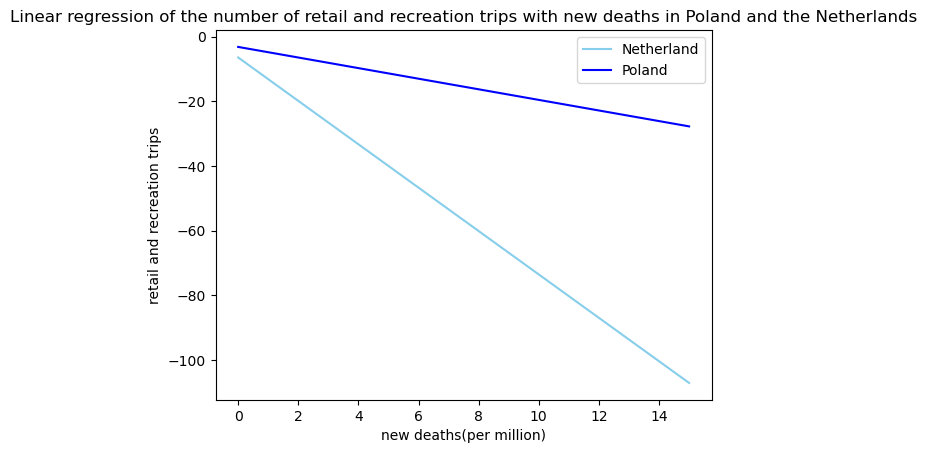

In [27]:
# Import a linear regression model 
lrModel_retail_and_recreation_nl = LinearRegression()
#Select independent and dependent variables. Since the toxicity of the virus is constantly changing, simply observing the number of new
#cases cannot accurately reflect the impact of the virus on the population. 
#So we use the number of new deaths to measure the impact of the virus.
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_retail_and_recreation']]
lrModel_retail_and_recreation_nl.fit(x,y)
lrModel_retail_and_recreation_nl.score(x,y)
#View intercept
alpha_retail_and_recreation_nl = lrModel_retail_and_recreation_nl.intercept_[0]

#View slope
beta_retail_and_recreation_nl = lrModel_retail_and_recreation_nl.coef_[0][0]

#Do the same regression analysis on the Polish retail and recreation data
lrModel_retail_and_recreation_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_retail_and_recreation']]
lrModel_retail_and_recreation_pl.fit(x,y)
lrModel_retail_and_recreation_pl.score(x,y)
#View intercept
alpha_retail_and_recreation_pl = lrModel_retail_and_recreation_pl.intercept_[0]

#View slope
beta_retail_and_recreation_pl = lrModel_retail_and_recreation_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of retail and recreation trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_retail_and_recreation_nl+beta_retail_and_recreation_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_retail_and_recreation_pl+beta_retail_and_recreation_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('retail and recreation trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on retail and recreation mobility in the Netherlands than on retail and recreation mobility in Poland. The decline in retail and recreation mobility in the Netherlands was more pronounced as the number of deaths increased.

### 3.2.2 Grocery & pharmacy

Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

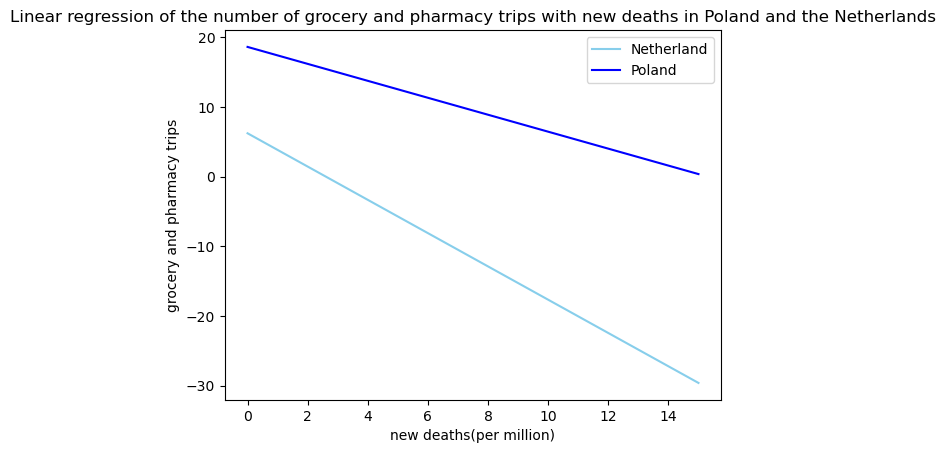

In [28]:
# Import a linear regression model 
lrModel_grocery_and_pharmacy_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_grocery_and_pharmacy']]
lrModel_grocery_and_pharmacy_nl.fit(x,y)
lrModel_grocery_and_pharmacy_nl.score(x,y)
#View intercept
alpha_grocery_and_pharmacy_nl = lrModel_grocery_and_pharmacy_nl.intercept_[0]

#View slope
beta_grocery_and_pharmacy_nl = lrModel_grocery_and_pharmacy_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_grocery_and_pharmacy_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_grocery_and_pharmacy']]
lrModel_grocery_and_pharmacy_pl.fit(x,y)
lrModel_grocery_and_pharmacy_pl.score(x,y)
#View intercept
alpha_grocery_and_pharmacy_pl = lrModel_grocery_and_pharmacy_pl.intercept_[0]

#View slope
beta_grocery_and_pharmacy_pl = lrModel_grocery_and_pharmacy_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of grocery and pharmacy trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_grocery_and_pharmacy_nl+beta_grocery_and_pharmacy_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_grocery_and_pharmacy_pl+beta_grocery_and_pharmacy_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('grocery and pharmacy trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on grocery and pharmacy mobility in the Netherlands than on grocery and pharmacy in Poland. The decline in grocery and pharmacy mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce grocery and pharmacy mobility even when the outbreak is not severe.

### 3.2.3 Parks
Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.

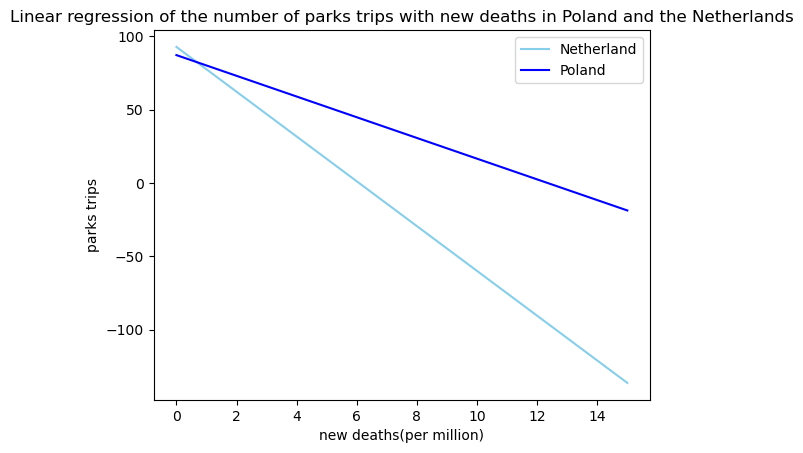

In [29]:
# Import a linear regression model 
lrModel_parks_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_parks']]
lrModel_parks_nl.fit(x,y)
lrModel_parks_nl.score(x,y)
#View intercept
alpha_parks_nl = lrModel_parks_nl.intercept_[0]

#View slope
beta_parks_nl = lrModel_parks_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_parks_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_parks']]
lrModel_parks_pl.fit(x,y)
lrModel_parks_pl.score(x,y)
#View intercept
alpha_parks_pl = lrModel_parks_pl.intercept_[0]

#View slope
beta_parks_pl = lrModel_parks_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of parks trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_parks_nl+beta_parks_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_parks_pl+beta_parks_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('parks trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on parks mobility in the Netherlands than on parks in Poland. The decline in parks mobility in the Netherlands was more pronounced as the number of deaths increased.

### 3.2.4 Transit stations

Mobility trends for places like public transport hubs such as subway, bus, and train stations.

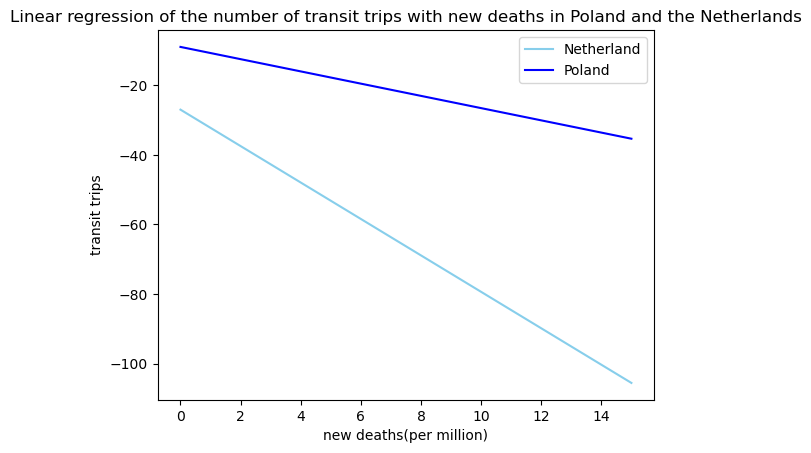

In [30]:
# Import a linear regression model 
lrModel_transit_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_transit']]
lrModel_transit_nl.fit(x,y)
lrModel_transit_nl.score(x,y)
#View intercept
alpha_transit_nl = lrModel_transit_nl.intercept_[0]

#View slope
beta_transit_nl = lrModel_transit_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_transit_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_transit']]
lrModel_transit_pl.fit(x,y)
lrModel_transit_pl.score(x,y)
#View intercept
alpha_transit_pl = lrModel_transit_pl.intercept_[0]

#View slope
beta_transit_pl = lrModel_transit_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of transit trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_transit_nl+beta_transit_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_transit_pl+beta_transit_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('transit trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on transit mobility in the Netherlands than on transit in Poland. The decline in transit mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce transit mobility even when the outbreak is not severe.

### 3.2.5 Workplaces
Mobility trends for places of work.

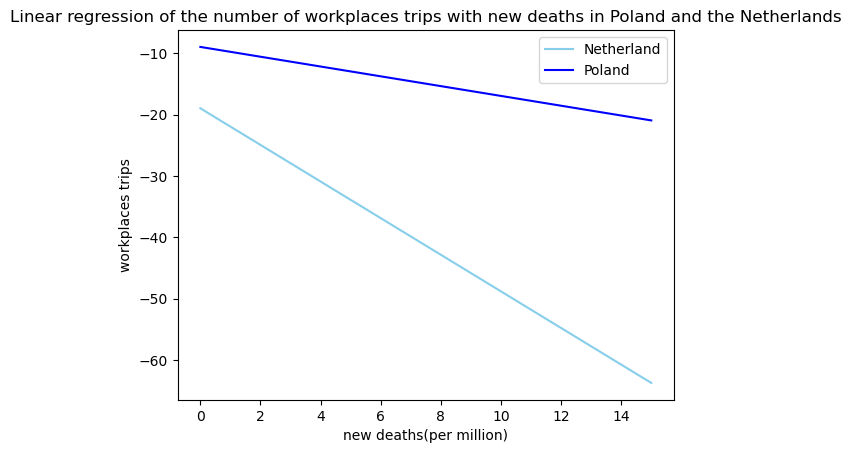

In [31]:
# Import a linear regression model 
lrModel_workplaces_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_workplaces']]
lrModel_workplaces_nl.fit(x,y)
lrModel_workplaces_nl.score(x,y)
#View intercept
alpha_workplaces_nl = lrModel_workplaces_nl.intercept_[0]

#View slope
beta_workplaces_nl = lrModel_workplaces_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_workplaces_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_workplaces']]
lrModel_workplaces_pl.fit(x,y)
lrModel_workplaces_pl.score(x,y)
#View intercept
alpha_workplaces_pl = lrModel_workplaces_pl.intercept_[0]

#View slope
beta_workplaces_pl = lrModel_workplaces_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of workplaces trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_workplaces_nl+beta_workplaces_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_workplaces_pl+beta_workplaces_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('workplaces trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on workplaces mobility in the Netherlands than on workplaces in Poland. The decline in workplaces mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce workplaces mobility even when the outbreak is not severe.

### 3.2.6 Residential
Mobility trends for places of residence.

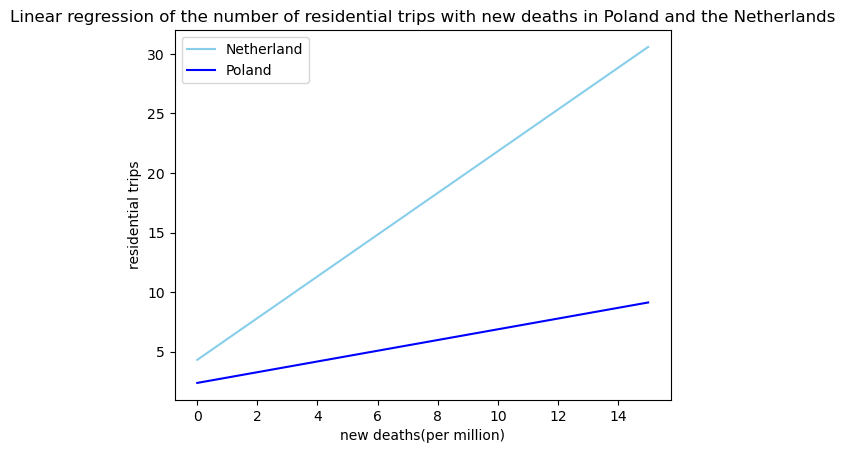

In [32]:
# Import a linear regression model 
lrModel_residential_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_residential']]
lrModel_residential_nl.fit(x,y)
lrModel_residential_nl.score(x,y)
#View intercept
alpha_residential_nl = lrModel_residential_nl.intercept_[0]

#View slope
beta_residential_nl = lrModel_residential_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_residential_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_residential']]
lrModel_residential_pl.fit(x,y)
lrModel_residential_pl.score(x,y)
#View intercept
alpha_residential_pl = lrModel_residential_pl.intercept_[0]

#View slope
beta_residential_pl = lrModel_residential_pl.coef_[0][0]

#Plot
plt.title('Linear regression of the number of residential trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_residential_nl+beta_residential_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_residential_pl+beta_residential_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('residential trips')
plt.show()

According to the regression equation, the impact of the epidemic on residential mobility in the Netherlands is greater than the impact of the epidemic on residential mobility in Poland. The upward trend in residential mobility in the Netherlands is even more pronounced as the death toll rises.

### 3.2.7 Summary
The above analysis shows that there is a relationship between COVID and travelling behaviour. During the epidemic, the need of residents to go out has greatly reduced and the need to return to the community has increased. 

Also, This sub-study shows the impact of COVID-19 on travelling behaviour in countries across different wealth classes.The number of travelling behaviour to different destinations in wealthier countries (e.g. the Netherlands) changes more significantly than in less wealthy countries (e.g. Poland). 

## 3.3 Travelling mode
This sub-question contributes to answering the main question because changes in transportation modes are a good indicator of the covid's impact on mobility.

To answer this sub-question, transportation modes in the Netherlands and Poland are divided into four categories: road, bicycle, railway, and other, with road and bicycle considered private modes of transportation and railway considered public transportation. A bar chart and a pie chart show the impact of COVID during the pre-pandemic and pandemic periods, respectively. Finally, because biking is a very popular mode of transportation in the Netherlands, the average number of annual bike trips by province in 2020 and 2021 are plotted on maps.   

In [17]:
# import processed data
covid_df = pd.read_csv('./data/travelling modes/processed/CovidData.csv', delimiter=',')
TransModes_NL = pd.read_csv('./data/travelling modes/processed/TransModes-NL.csv', delimiter=',')
mode_percentage = pd.read_csv('./data/travelling modes/processed/mode_percentage.csv',delimiter=',')

### 3.3.1 Determine two periods representing pre-pandemic and pandemic
- Firstly, visualize the covid daily new cases data of the Netherlands and Poland in a line chart.
- Secondly, add some rectangular to show some interesting time points.

In [18]:
# visualize the imported data
fig = px.line(covid_df, x='date', y='new_cases', color='location', title='Daily new cases per 1 million people since Feb 2020')

# mark typical pre-pandemic period
fig.add_vrect(x0="2020-04-09", x1="2020-08-25", col=1,
              annotation_text="Pre-pandemic", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2020-10-26", x1="2020-11-23", col=1,
              annotation_text="Pandemic 1", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2021-03-04", x1="2021-04-21", col=1,
              annotation_text="Pandemic 2", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 2
fig.add_vrect(x0="2022-01-03", x1="2022-02-25", col=1,
              annotation_text="Pandemic 3", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

The majority of 2020 (before October), as shown in the graph, can be considered a pre-pandemic period, with no discernible increase in the number of covid cases per million people. The first pandemic shock occurred at the end of this year, and a second pandemic shock occurred almost immediately after it in the middle of 2021. The Netherlands has a less obvious peak in the first two pandemic shocks then Poland. However, t he number of covid cases in the Netherlands reached a historical high at the third shock in early 2022.

Although the year 2022 has a much higher number of daily new cases, the year 2021 is actually a better one to represent the pandemic when the real-life situation is taken into account. In fact, the news of the covid had already spread by the end of 2020, and the pandemic shock at the start of 2021 was the first one people experienced, making them more vulnerable physically and psychologically. As a result, it is preferable to analyze data on transportation modes collected in 2021. The sections that follow use the years 2020 and 2021 to represent pre-pandemic and pandemic conditions, respectively, to examine the impact on transportation modes.  

### 3.3.2 Transportation mode in the Netherlands and Poland
This graph depicts the percentage distribution of different modes of transportation in the two countries from 2018 to 2021.

In [19]:
# plot bar chart
fig = px.bar(mode_percentage, x='Travel Modes', y='Percentage', animation_frame='Year', animation_group='Country',
            color='Travel Modes', text='Country', range_y=[0,100])
fig.update_layout(xaxis={'categoryorder':'total ascending'}, title_text="Transportation Modes in the Netherlands and Poland")

# drop animation buttons
fig["layout"].pop("updatemenus") 
fig.show()

This graph dipicts the proportion of each transportation mode of the two countries in the year 2020 and 2021.

In [20]:
# extract columns to be visualized
nl_2020 = mode_percentage[
    (mode_percentage['Year'] == 2020) &
    (mode_percentage['Country'] == 'The Netherlands')]

nl_2021 = mode_percentage[
    (mode_percentage['Year'] == 2021) &
    (mode_percentage['Country'] == 'The Netherlands')]

pl_2020 = mode_percentage[
    (mode_percentage['Year'] == 2020) &
    (mode_percentage['Country'] == 'Poland')]

pl_2021 = mode_percentage[
    (mode_percentage['Year'] == 2021) &
    (mode_percentage['Country'] == 'Poland')]

# create figure
fig = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"}]])

# draw each subplot
fig.add_trace(go.Pie(
     values = nl_2020['Percentage'],
     labels = nl_2020['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2020"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values = nl_2021['Percentage'],
     labels = nl_2021['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2021"), 
     row=1, col=2)

fig.add_trace(go.Pie(
     values = pl_2020['Percentage'],
     labels = pl_2020['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0.5, 1]),
     title = "Poland Transport modes in 2020"), 
     row=2, col=1)

fig.add_trace(go.Pie(
     values = pl_2021['Percentage'],
     labels = pl_2021['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0.5, 1]),
     title = "Poland Transport modes in 2021"), 
     row=2, col=2)

fig.update_layout(height=700, width=900, title_text="Transportation Modes in the Netherlands and Poland in 2020 and 2021")
fig.show()

As shown in the pie chart, bicycle and railway transportation were the most important modes of transportation in the Netherlands and Poland respectively in both 2020 and 2021. When considering bicycle and road transport as private mode of transportation and railway as public mode of transportation, it is interesting to note that the transportation modes in the Netherlands barely changed between the two years, whereas Poland saw a decrease in public transportation in the year 2021. This change in transportation modes corresponds to the variation in the number of new daily cases, where there were two obvious pandemic shocks at the end of 2020 and beginning of 2021. This indicates that people tend to transfer to private transport after pandemic, which comlies with common sense. 

### 3.3.3 Annual bycicle trips of the Netherlands in 2020 and 2021 
We visualize the data of average bycicle trips from the year of 2020 and 2021 at the province level, as cycling is an important mode of transportation in the Netherlands.

In [22]:
# extract wanted rows and columns
bikeNl = TransModes_NL[TransModes_NL['Travel Modes']=='Bike']
bikeNl = bikeNl[bikeNl['Region'].str.contains('(LD)') == False]
bikeNl = bikeNl[bikeNl['Region'].str.contains('The Netherlands') == False]

# format column string
bikeNl['Region'] = bikeNl['Region'].str.replace('[ (PV)]', '')
bikeNl['Region'] = bikeNl['Region'].replace(['Fryslân'],'Friesland')

# bike trips in 2020
bike_2020 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2020)]
bike_2020 = bike_2020.drop_duplicates(subset=['Region'])
mean_value = bike_2020['Average Trip Per Year'].mean()
bike_2020['Average Bike Trips in 2020'] = bike_2020['Average Trip Per Year']
bike_2020['Average Bike Trips in 2020'].fillna(value=mean_value, inplace=True)
bike_2020 = bike_2020.loc[:, ['Region', 'Average Bike Trips in 2020']]
bike_2020 = bike_2020.reset_index(drop=True)

# bike trips in 2021
bike_2021 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2021)]
bike_2021 = bike_2021.drop_duplicates(subset=['Region'])
mean_value = bike_2021['Average Trip Per Year'].mean()
bike_2021['Average Bike Trips in 2021'] = bike_2021['Average Trip Per Year']
bike_2021['Average Bike Trips in 2021'].fillna(value=mean_value, inplace=True)
bike_2021 = bike_2021.loc[:, ['Region', 'Average Bike Trips in 2021']]
bike_2021 = bike_2021.reset_index(drop=True)

# import the Netherlands shapefile at province level
df_map = gpd.read_file('./data/travelling modes/processed/stanford-st293bj4601-geojson.json')
df_map = df_map[df_map['type_1'].str.contains('Water body') == False]
df_map = df_map.rename(columns={'name_1':'Region'})
df_map = df_map.reset_index(drop=True)

# merge dataframes
map_bike = pd.merge(df_map, bike_2020, on='Region')
map_bike = pd.merge(map_bike, bike_2021, on='Region')

C:\Users\cynthia\AppData\Local\Temp\ipykernel_101156\2781687773.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\cynthia\AppData\Local\Temp\ipykernel_101156\2781687773.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



This picture plots the annual trips made by bycicles in the Netherlands at the province level in the year of 2020 and 2021. 

<AxesSubplot:title={'center':'Average bike trips in 2021'}>

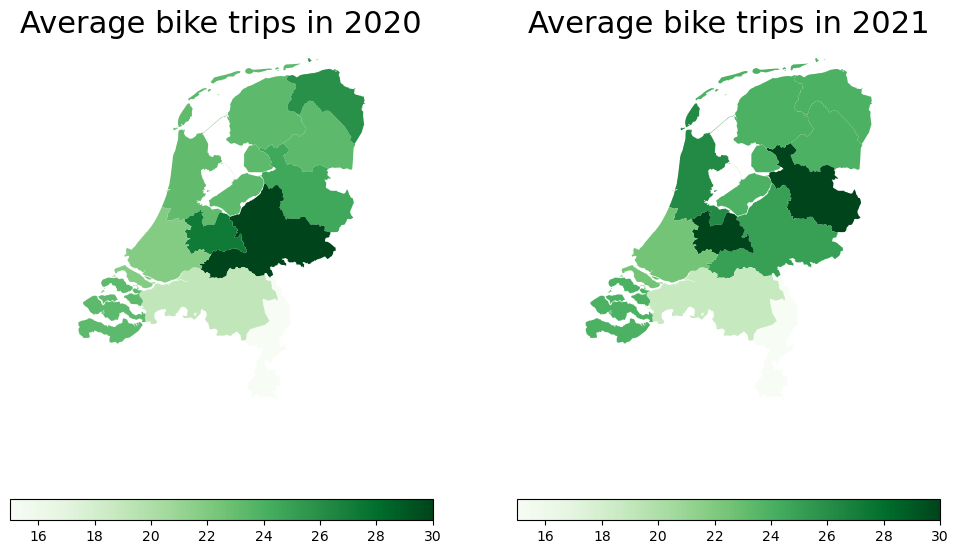

In [23]:
# create a picture
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(nrows=1, ncols=2)

# plot bike trips in 2020
ax1 = fig.add_subplot(gs[0,0])
ax1.axis('off')
ax1.set_title(
    'Average bike trips in 2020', 
    fontdict={'fontsize': '22', 'fontweight': '3'})

fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2020", cmap='Greens', linewidth=0.6, ax=ax1)

# plot bike trips in 2021
ax2 = fig.add_subplot(gs[0,1])
ax2.axis('off')
ax2.set_title(
    'Average bike trips in 2021', 
    fontdict={'fontsize': '22', 'fontweight': '3'})
fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2021", cmap='Greens', linewidth=0.6, ax=ax2)

In general, the second subplot's relatively more deepgreen areas indicate that there were more bike trips after the pandemic. This is consistent with the conclusion that the pandemic causes people to prefer private transportation when traveling.

### 3.3.4 Summary

As is analysised in the previous section, the pandemic changes people's preference on the travel modes, althouth this change is small. After the pandemic shock happened at the end of the 2020 and the beginning of 2021, many people in Poland changed their travel modes from the public modes to private modes. Because there is no obvious growth in cases in the Netherlands during the two pandemic shocks in Poland, the transportation modes in the Netherlands almost remain unchaged. However when looking at the avarage bike trips in the Netherlands in 2020 and 2021, many provinces have more people travel with bike and even the others remains the same level. 

In conclusion, the pandemic causes people to prefer private transport when travelling.

## 3.4 Digitalization
We have this sub-question because the level of digitalization has a significant impact on people's travelling needs.

To determine the key indicator, we reference to the Digital Economy and Society Index (DESI) 2022 reports of the European Commission, who has monitored Member States’ progress on digital and published annual DESI reports since 2014. DESI originally has four dimensions, and we select the corresponding sub-dimensions. The final index system is:
- human capital
    - Percentage of individuals who have basic or above basic overall digital skills
- connectivity
    - Percentage of households with broadband access
- Intergration of digital technology
    - Percentage of enterprises using software solutions, like CRM (Customer Relationship Management) to analyse information about clients for marketing purposes
- Digital public services
    - Percentage of individuals using the internet for interaction with public authorities


In [33]:
# import processed data
df_digi = pd.read_csv('./data/digitalization/process/digi.csv')
df_digi = df_digi.set_index('Year')
df_digi_2015 = df_digi.iloc[5:]

### 3.4.1 Human Capital
Indicator: Percentage of individuals who have basic or above basic overall digital skills

In [47]:
human_col = ['EU Human Capital', 'NL Human Capital', 'PL Human Capital', 'RO Human Capital']
fig = px.line(df_digi_2015, x=df_digi_2015.index, y=human_col, title="Human capital of EU, the Netherlands, Poland and Romania")
fig.show()

According to the DESI 2022 Report, the Netherlands is the frontrunners in the EU, while Poland and Romania are lagging behind. A large part of the EU population still lacks basic digital skills. This phenomenon is also reflected in the line chart.

As for the impact of COVID-19, percentage of individuals with basic or above basic overall digital skills in Poland and Romania slightly declines from 2020, and that of EU even drops more dramatically. The Netherlands, however, has a steady level of individuals with digital skills.

### 3.4.2 Broadband connectivity
Indicator: Percentage of households with broadband access

In [48]:
conn_col = ['EU Connectivity', 'NL Connectivity', 'PL Connectivity', 'RO Connectivity']
fig = px.line(df_digi, x=df_digi.index, y=conn_col, title="Broadband connectivity of EU, the Netherlands, Poland and Romania")
fig.show()

While the EU has full coverage of broadband, not all households have access to it. Before epidemic, almost all households in the Netherlands have the access, while in Poland and Romania, only around 85% of households have it. During the epidemic, the percentage of households with broadband access in all countries has increased, but it has a bigger rise in the poor countries.

### 3.4.3 Integration of digital technology by businesses
Indicator: Percentage of enterprises using software solutions, like CRM (Customer Relationship Management) to analyse information about clients for marketing purposes

In [49]:
tech_col = ['EU Technology', 'NL Technology', 'PL Technology', 'RO Technology']
fig = px.line(df_digi, x=df_digi.index, y=tech_col, title="Integration of digital technology by businesses of EU, the Netherlands, Poland and Romania")
fig.show()

From 2012 to 2021, the Netherlands has a siginicantly higher level of digital transformation of business, while it remains median in Poland, and very low in Romania.

During the epidemic, it rose a bit in the Netherlands, remained stable in Poland and droped greatly in Romania. It might be due to the fact that in poor countries, there are limited ICT specialists, and because of the lockdown, they cannot work, so the integration of digital technology by businesses even drops in Romania.

### 3.4.4 Digital Public Service
Indicator: Percentage of individuals using the internet for interaction with public authorities

In [52]:
pub_col = ['EU Public Service', 'NL Public Service', 'PL Public Service', 'RO Public Service']
fig = px.line(df_digi, x=df_digi.index, y=pub_col, title="Digital public service of EU, the Netherlands, Poland and Romania")
fig.show()

According to DESI 2022 Report, the Netherlands is one of the countries with the highest scores for digital public services in DESI, while Romania have the lowest. Poland stays in between. This is consistent with the pattern of the line chart.

As shown in the chart, the level of digital transformation of public services has a similar rise in all three countries after the COVID broke out.

### 3.4.5 Summary
Digi Index: The mean value of the four indicators.

In [50]:
# overal digitalization index
index_col = ['EU Digi Index', 'NL Digi Index', 'PL Digi Index', 'RO Digi Index']
fig = px.line(df_digi_2015, x=df_digi_2015.index, y=index_col, title="Digitalization index of three European countries")
fig.show()

In general, the overall level of digitalization: Netherlands > Poland > Romania. During the epidemic, the need of digitalization indeeed increases everywhere, but the real development is not fast. The poor countries even have a slower development. We think it is because they lack infrastructure, and the specialists.

# 4 Conclusion

After a detailed data analysis in two or three countries, we discover that:

1. Traffic volume

Traffic volume in different countries drops significantly during the coronavirus pandemic. Wealthier countries, like the Netherlands, seem to have a bigger decline in traffic volume than less wealthy countries, like Poland and Romania. 

2. Travelling behaviour

COVID-19 has a significant impact on the travelling behaviour of residents from various countries. During the epidemic, the need of residents to go out has greatly reduced and the need to return to the community has increased. Its impact is stronger in wealthier countries like the Netherlands than the less wealthy countries like Poland.

3. Travelling mode

The pandemic changes people's preference on the travel modes, althouth this change is small. The pandemic causes people to prefer private transport when travelling, both in wealthier and less wealthy countries.

4. Digitalization

During the epidemic, the need of digitalization indeeed increases everywhere, but the real development remains slow. The poor countries like Romania even have a slower development, and show big disadvantage in lack of ICT speciliasts and digital transformation of business.

# 5 Discussion

This research gives a good indication of the impact of COVID on mobility in countires of a different wealth category. However, based on this research, hard conclusions can not yet be made. This research could therefore be improved by looking at more countries and also monthly data, when it becomes available. Statistical tests can than be conducted to compare the mean traffic decline in a group of wealthy and a group of less wealthy countries.

Also, more research behind the reason why this occurs is nessecary. A few possible explanations have been mentioned already.

# 6 Work Allocation
The initial idea is to let everyone carry out an analysis task. The eventual work allocation is:

- Daniel Auerbach: traffic volume, discussion
- Ruisheng Liu: travelling behaviour
- Chenghua Yang: travelling mode
- Cynthia: digitalization, conclusion, project management